In [1]:
import os
import numpy as np
import tensorflow as tf
import hls4ml
import matplotlib.pyplot as plt



2024-09-23 17:49:37.638468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 17:49:37.727982: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [2]:
it_min = -128
it_max = 128
precision = 8

In [36]:
%%time
LUT = [[] for x in range(2,precision +1)]
for prec in range(2,precision + 1,1):
    for z in range(it_min ,it_max,1):
        with open('./LUT_sim/prec_' + str(prec) + '/it_' + str(z) + '/mult.prj/solution1/syn/report/csynth.rpt') as f:
            for i,lines in enumerate(f):
                if(i == 21):
                    sp = lines.split("|")
                    lut = sp[13].replace(" ","")
                    if(lut != "-"):
                        lut = int(lut.split("(")[0])
                    else:
                        lut = 0
                    #sp = sp.split("(")
                    LUT[prec-2].append(lut)
                    break
        f.close()
LUT = np.array(LUT)

CPU times: user 33.9 ms, sys: 20.1 ms, total: 54 ms
Wall time: 52.4 ms


In [37]:
prec_array = np.arange(it_min,it_max)

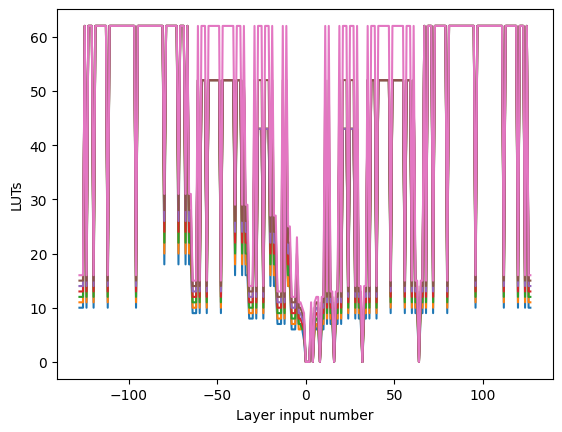

In [38]:
for i in range(7):
    plt.plot(prec_array,LUT[i])
    plt.xlabel("Layer input number")
    plt.ylabel("LUTs")

In [41]:
if not(os.path.exists("./LUT_sim/saved_luts/")):
    os.mkdir("./LUT_sim/saved_luts")
for pr in range(2,9,1):
    with open("./LUT_sim/saved_luts/mult_" + str(pr) + ".txt","w") as w:
        for i in range(it_min,it_max,1):
            w.write("LUT" + str(i) + " | " + str(LUT[pr - 2,i - it_min]) + "\n")

Create plot for LUTs with DSP multiplications

In [39]:
%%time
LUT_dsp = [[] for x in range(2,precision + 1)]
#LUT_dsp = []
for prec in range(2,precision + 1):
    for z in range(it_min ,it_max,1):
        with open('./LUT_DSP/prec_' + str(prec) + '/it_' + str(z) + '/mult.prj/solution1/syn/report/csynth.rpt') as f:
            for i,lines in enumerate(f):
                if(i == 21):
                    sp = lines.split("|")
                    lut = sp[13].replace(" ","")
                    if(lut != "-"):
                        lut = int(lut.split("(")[0])
                    else:
                        lut = 0
                    #sp = sp.split("(")
                    LUT_dsp[prec - 2].append(lut)
                    break
        f.close()
LUT_dsp = np.array(LUT_dsp)

CPU times: user 34.4 ms, sys: 20.2 ms, total: 54.6 ms
Wall time: 52.9 ms


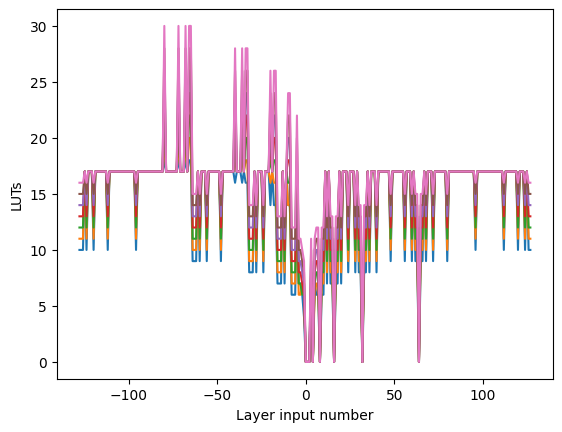

In [40]:
for j in range(7):
    plt.plot(prec_array,LUT_dsp[j])
    plt.xlabel("Layer input number")
    plt.ylabel("LUTs")

In [28]:
if not(os.path.exists("./LUT_DSP/saved_luts/")):
    os.mkdir("./LUT_DSP/saved_luts")
for pr in range(2,9,1):
    with open("./LUT_DSP/saved_luts/mult_" + str(pr) + ".txt","w") as w:
        for i in range(it_min,it_max,1):
            w.write("LUT" + str(i) + " | " + str(LUT_dsp[pr - 2,i - it_min]) + "\n")